In [58]:
import pandas as pd

import plotly.express as px

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

### Datasets

In [2]:
data_train = pd.read_csv('gold_recovery_train.csv')
subset = data_train[['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]
subset = subset.dropna(axis=0)

In [3]:
data_test = pd.read_csv('gold_recovery_test.csv')

In [4]:
data_full = pd.read_csv('gold_recovery_full.csv')

In [5]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Missing Values Data Preprocessing

In [8]:
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [9]:
data_train.bfill(inplace=True)

In [10]:
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [11]:
data_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [12]:
data_test.bfill(inplace=True)

In [13]:
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [14]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [15]:
data_full.bfill(inplace=True)

In [16]:
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

### Duplicate Values

In [17]:
data_train.duplicated().sum()

0

In [18]:
data_test.duplicated().sum()

0

In [19]:
data_full.duplicated().sum()

0

### Data Types

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               16860 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


In [21]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

In [24]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

In [25]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

In [26]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


In [27]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

In [28]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

X_train = data_train_2.drop(['rougher.output.recovery', "date"], axis=1)
y_train = data_train_2['rougher.output.recovery']
X_test = data_test.drop(['rougher.output.recovery', "date"], axis=1)
Y_test = data_test['rougher.output.recovery']

In [29]:
data_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### Recovery function

Fillna with ffill (fill all missing values with previous value) take value from previous reading.

In [30]:
C = data_train['rougher.output.concentrate_au']

F = data_train['rougher.input.feed_au']

T = data_train['rougher.output.tail_au']

In [31]:
def recovery(C, F, T):
    numerator = C * (F - T) 
    denominator = F * (C - T) 
    #epsilon = 1e10
    #division = numerator / (denominator + epsilon)
    division = numerator / denominator
    recovery = division * 100
    return recovery

In [32]:
# Harry's code
#subset = data_train[['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]
C = subset['rougher.output.concentrate_au']

F = subset['rougher.input.feed_au']

T = subset['rougher.output.tail_au']
subset['calculated_recovery'] = recovery(C, F, T)
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14287 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14287 non-null  float64
 1   rougher.input.feed_au          14287 non-null  float64
 2   rougher.output.tail_au         14287 non-null  float64
 3   rougher.output.recovery        14287 non-null  float64
 4   calculated_recovery            14287 non-null  float64
dtypes: float64(5)
memory usage: 669.7 KB


In [33]:
subset[subset['calculated_recovery'].isna()]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,calculated_recovery


In [34]:
mean_absolute_error(subset['calculated_recovery'], subset['rougher.output.recovery'])

9.303415616264301e-15

In [35]:
data_train['calculated_recovery'] = recovery(C, F, T)

In [36]:
data_train.isna().sum()

date                                             0
final.output.concentrate_ag                      0
final.output.concentrate_pb                      0
final.output.concentrate_sol                     0
final.output.concentrate_au                      0
                                              ... 
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
calculated_recovery                           2573
Length: 88, dtype: int64

In [37]:
data_train[data_train['calculated_recovery'].isna()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,calculated_recovery
53,2016-01-17 05:00:00,5.919503,11.078044,6.215769,42.922611,71.308281,10.866006,1.577753,17.550397,2.476280,...,-548.238797,12.042964,-550.430774,9.989624,-499.606754,7.950446,-500.352648,12.011728,-599.043399,NaN
99,2016-01-19 03:00:00,0.000000,0.000000,0.000000,0.000000,23.290474,0.000000,0.000000,0.000000,0.000000,...,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756,NaN
100,2016-01-19 04:00:00,0.000000,0.000000,0.000000,0.000000,23.290474,0.000000,0.000000,0.000000,0.000000,...,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301,NaN
101,2016-01-19 05:00:00,0.000000,0.000000,0.000000,0.000000,23.290474,0.000000,0.000000,0.000000,0.000000,...,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819,NaN
102,2016-01-19 06:00:00,0.000000,0.000000,0.000000,0.000000,23.290474,0.000000,0.000000,0.000000,0.000000,...,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697,2018-08-11 16:59:59,3.958494,10.765712,7.887805,46.249962,70.871419,14.793868,4.400949,8.613606,3.868595,...,-501.051083,20.046078,-501.394212,17.982038,-499.849382,12.989903,-500.207022,17.997144,-501.774775,NaN
16698,2018-08-11 17:59:59,4.004948,9.668969,8.652235,46.803491,56.203095,16.301126,5.009660,9.603387,5.517890,...,-499.974814,19.987702,-499.084535,18.000712,-500.307173,13.019299,-500.132894,18.010586,-502.012474,NaN
16699,2018-08-11 18:59:59,3.725068,8.274357,8.841145,48.654627,49.317741,16.118560,5.002483,10.102624,5.733715,...,-501.346407,20.033370,-500.583932,17.968434,-501.021691,12.960565,-500.076888,17.994091,-504.227412,NaN
16700,2018-08-11 19:59:59,3.455061,7.840984,8.833333,49.429785,50.760512,15.543128,4.780950,9.944061,5.851795,...,-500.439620,20.007188,-500.244110,17.955487,-499.845317,13.024346,-500.219297,17.989071,-502.324529,NaN


In [38]:
data_train['calculated_recovery'].dropna(inplace=True)

data_train.isna().sum()

date                                             0
final.output.concentrate_ag                      0
final.output.concentrate_pb                      0
final.output.concentrate_sol                     0
final.output.concentrate_au                      0
                                              ... 
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
calculated_recovery                           2573
Length: 88, dtype: int64

In [39]:
data_train['calculated_recovery'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min         -0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: calculated_recovery, dtype: float64

In [40]:
dt_clean = data_train.dropna()

In [41]:
calc_recovery_mae = mean_absolute_error(dt_clean['calculated_recovery'], dt_clean['rougher.output.recovery'])

calc_recovery_mae

9.303415616264301e-15

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [42]:
not_in_test = data_train.columns.difference(data_test.columns)

In [43]:
train_nt = data_train[not_in_test]

train_nt.head()

,calculated_recovery,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,...,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
0,87.107763,6.055403,42.192020,9.889648,5.507324,70.541216,10.411962,2.143149,0.895447,16.904297,...,28.029297,87.107763,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648
1,86.843261,6.029369,42.701629,9.968944,5.257781,69.266198,10.462676,2.224930,0.927452,16.634514,...,28.067063,86.843261,4.955378,1.184827,0.536689,18.965234,14.265474,2.488248,4.592547,9.001494
2,86.842308,6.055926,42.657501,10.213995,5.383759,68.116445,10.507046,2.257889,0.953716,16.208849,...,27.454037,86.842308,4.843460,1.162562,0.546416,18.808533,14.115662,2.458187,4.624775,8.842896
3,87.226430,6.047977,42.689819,9.977019,4.858634,68.347543,10.422762,2.146849,0.883763,16.532835,...,27.341277,87.226430,4.655288,1.079755,0.542525,19.330200,13.732071,2.322062,4.482453,9.122857
4,86.688794,6.148599,42.774141,10.142511,4.939416,66.927016,10.360302,2.055292,0.792826,16.525686,...,27.041023,86.688794,4.552800,1.012642,0.515438,19.267422,14.079996,2.330448,4.470737,8.871028


In [44]:
tnt_dtype = train_nt.dtypes

tnt_dtype

calculated_recovery                                   float64
final.output.concentrate_ag                           float64
final.output.concentrate_au                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_au                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_au                        float64
primary_

2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [45]:
au_input = data_train['rougher.input.feed_au'].sum()

au_rougher = data_train['rougher.output.concentrate_au'].sum()

au_output = data_train['final.output.concentrate_au'].sum()

In [ ]:
ag_input = data_train['rougher.input.feed_ag'].sum()

ag_rougher = data_train['rougher.output.concentrate_ag'].sum()

ag_output = data_train['final.output.concentrate_ag'].sum()

In [ ]:
pb_input = data_train['rougher.input.feed_au'].sum()

pb_rougher = data_train['rougher.output.concentrate_pb'].sum()

pb_output = data_train['final.output.concentrate_pb'].sum()

In [68]:
au_stages = ['Input', 'Rougher', 'Output']

au_amount = [au_input, au_rougher, au_output]

au_data = {'Stage': au_stages, 'Au Concentration Amount': au_amount}

au_df = pd.DataFrame(au_data)

au_df

,Stage,Au Concentration Amount
0,Input,120312.898481
1,Rougher,291985.848802
2,Output,662921.096778


In [69]:
ag_stages = ['Input', 'Rougher', 'Output']

ag_amount = [ag_input, ag_rougher, ag_output]

ag_data = {'Stage': ag_stages, 'Ag Concentration Amount': ag_amount}

ag_df = pd.DataFrame(ag_data)

ag_df

,Stage,Ag Concentration Amount
0,Input,131419.615748
1,Rougher,177530.996531
2,Output,79253.150493


In [73]:
pb_stages = ['Input', 'Rougher', 'Output']

pb_amount = [pb_input, pb_rougher, pb_output]

pb_data = {'Stage': pb_stages, 'Pb Concentration Amount': pb_amount}

pb_df = pd.DataFrame(pb_data)

pb_df

,Stage,Pb Concentration Amount
0,Input,120312.898481
1,Rougher,115450.909639
2,Output,153092.550044


In [66]:
au_bar = px.bar(au_df, x='Stage', y='Au Concentration Amount', title='Au Concentration per Purificaiton Stage', color_discrete_sequence=['gold'])

au_bar.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'))
au_bar.update_xaxes(showline=True, linewidth=2, linecolor='black')

au_bar.update_yaxes(showline=True, linewidth=2, linecolor='black')
au_bar.show()

In [71]:
ag_bar = px.bar(ag_df, x='Stage', y='Ag Concentration Amount', title='Ag Concentration per Purificaiton Stage', color_discrete_sequence=['silver'])

ag_bar.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'))
ag_bar.update_xaxes(showline=True, linewidth=2, linecolor='black')

ag_bar.update_yaxes(showline=True, linewidth=2, linecolor='black')
ag_bar.show()

In [74]:
pb_bar = px.bar(pb_df, x='Stage', y='Pb Concentration Amount', title='Pb Concentration per Purification Stage', color_discrete_sequence=['black'])

pb_bar.update_layout(plot_bgcolor='white', yaxis=dict(showgrid=True, gridcolor='black'))
pb_bar.update_xaxes(showline=True, linewidth=2, linecolor='black')

pb_bar.update_yaxes(showline=True, linewidth=2, linecolor='black')
pb_bar.show()

```Python
# Train feed size cols
rougher_feed_size_train = train_data['rougher.input.feed_size']
primary_cleaner_feed_size_train = train_data['primary_cleaner.input.feed_size']

# Test feed size cols
rougher_feed_size_test = test_data['rougher.input.feed_size']
primary_cleaner_feed_size_test = test_data['primary_cleaner.input.feed_size']


# Create figure for plots
plt.figure(figsize=(14, 10))

# Histogram for Rougher Feed Size
plt.subplot(2, 2, 1)
plt.hist(rougher_feed_size_train, bins=200, alpha=0.5, label='Train', color='blue')
plt.hist(rougher_feed_size_test, bins=200, alpha=0.5, label='Test', color='red')
plt.legend(loc='upper right')
plt.title('Feed Particle Size Distributions (Rougher Input)')
plt.xlim(0, 160)

# Histogram for Primary Cleaner Feed Size
plt.subplot(2, 2, 2)
plt.hist(primary_cleaner_feed_size_train, bins=60, alpha=0.5, label='Train', color='blue')
plt.hist(primary_cleaner_feed_size_test, bins=60, alpha=0.5, label='Test', color='red')
plt.legend(loc='upper right')
plt.title('Feed Particle Size Distributions (Primary Cleaner Input)')

plt.tight_layout()
plt.show()```

Looks alot better!


# Train feed size cols
rougher_feed_size_train = train_data['rougher.input.feed_size']
primary_cleaner_feed_size_train = train_data['primary_cleaner.input.feed_size']

# Test feed size cols
rougher_feed_size_test = test_data['rougher.input.feed_size']
primary_cleaner_feed_size_test = test_data['primary_cleaner.input.feed_size']

# Create figure for plots
plt.figure(figsize=(14, 10))

# Histogram for Rougher Feed Size
plt.subplot(2, 2, 1)
plt.hist(rougher_feed_size_train, bins=200, alpha=0.5, label='Train', color='blue')
plt.hist(rougher_feed_size_test, bins=200, alpha=0.5, label='Test', color='red')
plt.legend(loc='upper right')
plt.title('Feed Particle Size Distributions (Rougher Input)')
plt.xlim(0, 160)

Sure, let's create a simple example using Plotly Express to display two histograms on the same chart. Plotly Express allows us to easily create and customize visualizations, including multiple histograms in one plot.

Here’s a basic guide:

1. **Import the necessary libraries**: You will need to import Plotly Express and a data manipulation library like Pandas.

2. **Prepare your data**: You should have your data ready. For this example, we'll use random data.

3. **Create the histograms**: Use `px.histogram()` and the `color` argument to differentiate between the two histograms.

Here’s a sample code:

```python
import plotly.express as px
import pandas as pd
import numpy as np

# Generate random data
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'Value': np.concatenate([np.random.normal(loc=0, scale=1, size=500), np.random.normal(loc=3, scale=1, size=500)]),
    'Category': ['Category 1']*500 + ['Category 2']*500
})

# Create the histogram
fig = px.histogram(data, x='Value', color='Category', barmode='overlay', opacity=0.7, title='Overlay of Two Histograms')

# Show the plot
fig.show()
```

### Key Points:
- **`barmode='overlay'`**: This overlays the histograms on top of each other. You can also use `'group'` to display them side by side.
- **`opacity`**: Adjusts the transparency, allowing you to see overlapping areas more clearly.
- **`color`**: Differentiates the histograms based on the column specified.

Try running this code with your dataset, and you can adjust the parameters as needed for your particular data and visualization preferences. Let me know if you have any specific questions!

plt.subplot(2, 2, 1)
plt.hist(rougher_feed_size_train, bins=200, alpha=0.5, label='Train', color='blue')
plt.hist(rougher_feed_size_test, bins=200, alpha=0.5, label='Test', color='red')
plt.legend(loc='upper right')
plt.title('Feed Particle Size Distributions (Rougher Input)')
plt.xlim(0, 160)

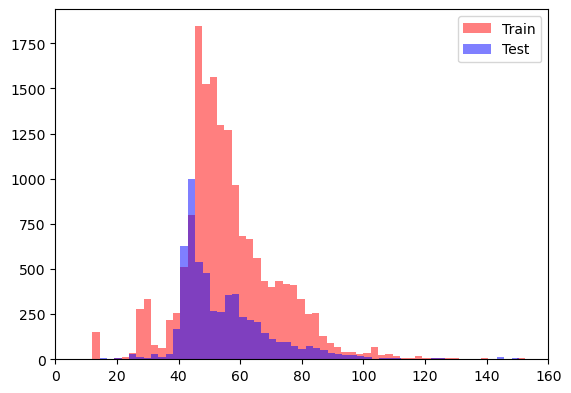

In [97]:
r_feed_train = data_train['rougher.input.feed_size']
pc_feed_train = data_train['primary_cleaner.input.feed_size']

r_feed_test = data_test['rougher.input.feed_size']
pc_feed_test = data_test['primary_cleaner.input.feed_size']

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(r_feed_train, bins=200, alpha=0.5, label='Train', color='red')
plt.hist(r_feed_test, bins=200, alpha=0.5, label='Test', color='blue')
plt.legend(loc='upper right')

plt.xlim(0, 160)

plt.tight_layout
plt.show()

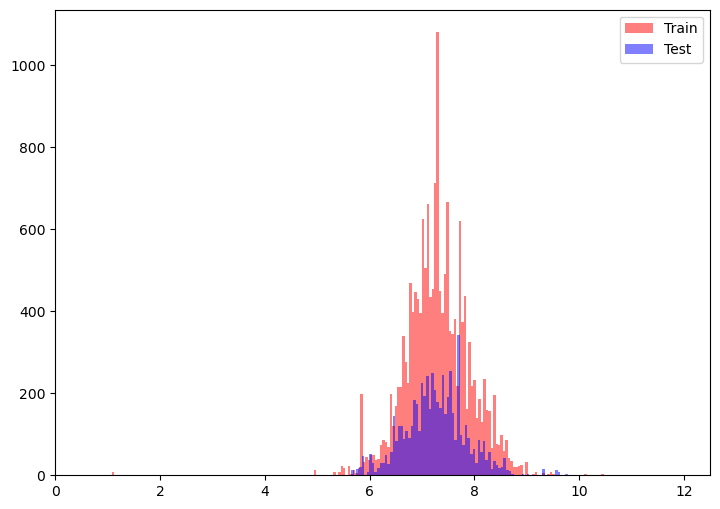

In [96]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
plt.hist(pc_feed_train, bins=200, alpha=0.5, label='Train', color='red')
plt.hist(pc_feed_test, bins=200, alpha=0.5, label='Test', color='blue')
plt.legend(loc='upper right')

plt.xlim(0, 12.5)

plt.tight_layout()
plt.show()

In [98]:
def smape(n, i, t, p, rougher, final):
    sample_fraction = 1 / n
    epsilon = 0
    numerator = t(i) - p(i)
    denominator = t(i) + p(i)
    new_denominator = denominator / 2
    new_fraction = numerator / new_denominator
    
    smape = sample_fraction * epsilon * new_fraction * 100
    
    return smape

In [99]:
def final_smape(rougher_smape, final_smape):
    final = 0.25 * rougher_smape + 0.75 * final_smape 
    return final